In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [4]:
data.shape

(8425, 23)

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### EDA

In [6]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [10]:
for i in data.columns:
    print(f"{i} = {data[i].nunique()} \n {data[i].value_counts()}\n\n")

Date = 3004 
 2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Location = 12 
 Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


MinTemp = 285 
  12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


MaxTemp = 331 
 19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


Rainfall = 250 
 0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ...

In [11]:
data['Date'].dtypes

dtype('O')

In [12]:
data.Date = pd.to_datetime(data.Date)

In [13]:
data['Date'].dtypes

dtype('<M8[ns]')

In [14]:
data.shape

(8425, 23)

In [15]:
# Extracting Day. month and year from date as separate feature
data['Day'] = pd.to_datetime(data.Date,format="%d/%m/%Y").dt.day
data['Month'] = pd.to_datetime(data.Date,format="%d/%m/%Y").dt.month
data['Year'] = pd.to_datetime(data.Date,format="%d/%m/%Y").dt.year
data = data.drop(columns = 'Date', axis = 1)

In [16]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [17]:
data.shape

(8425, 25)

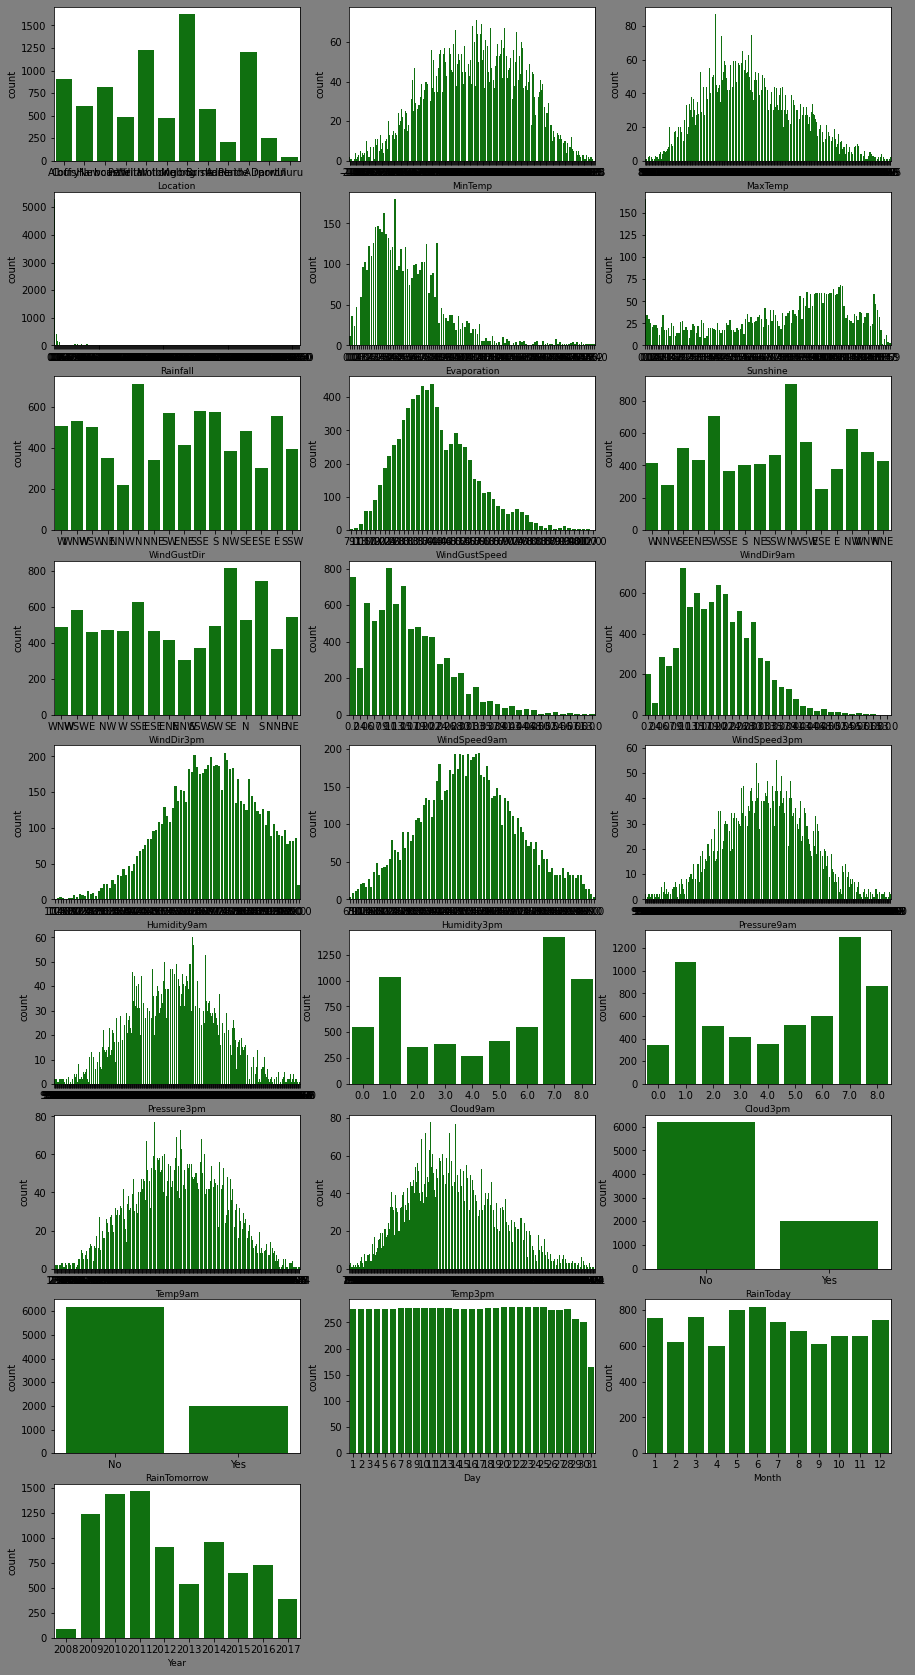

In [18]:
plt.figure(figsize=(15,30),facecolor='grey')
plotnumber = 1


for column in data:
    if plotnumber<=27:
        ax=plt.subplot(9,3,plotnumber)
        sns.countplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

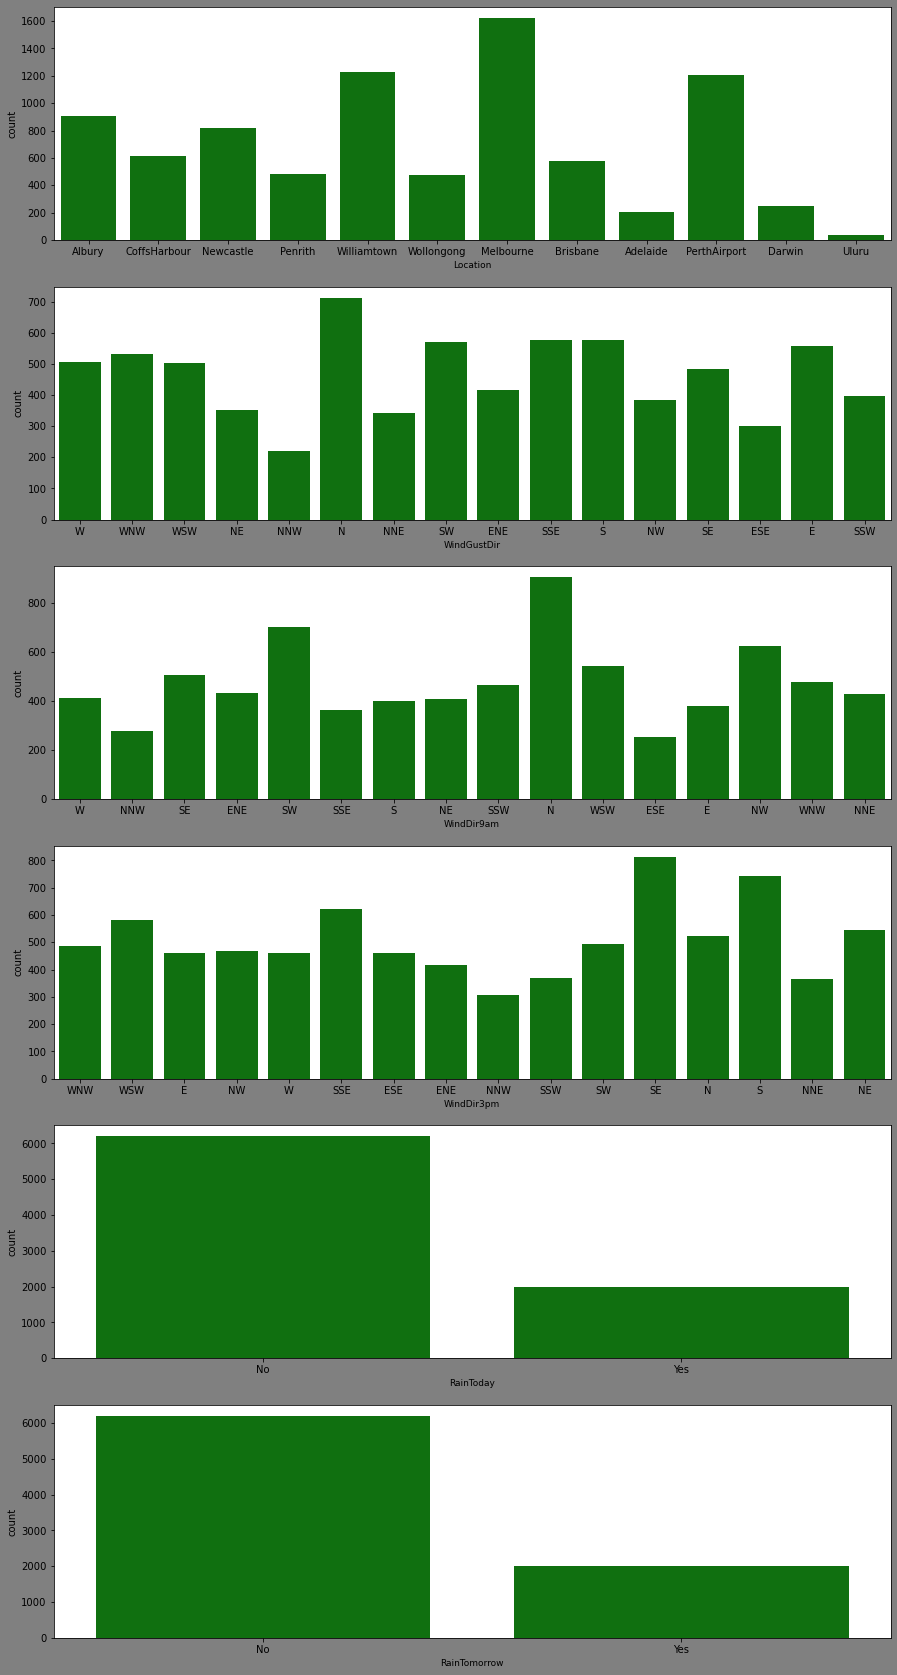

In [19]:
plt.figure(figsize=(15,30),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes == 'object':
        if plotnumber<=6:
            ax=plt.subplot(6,1,plotnumber)
            sns.countplot(data[column],color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

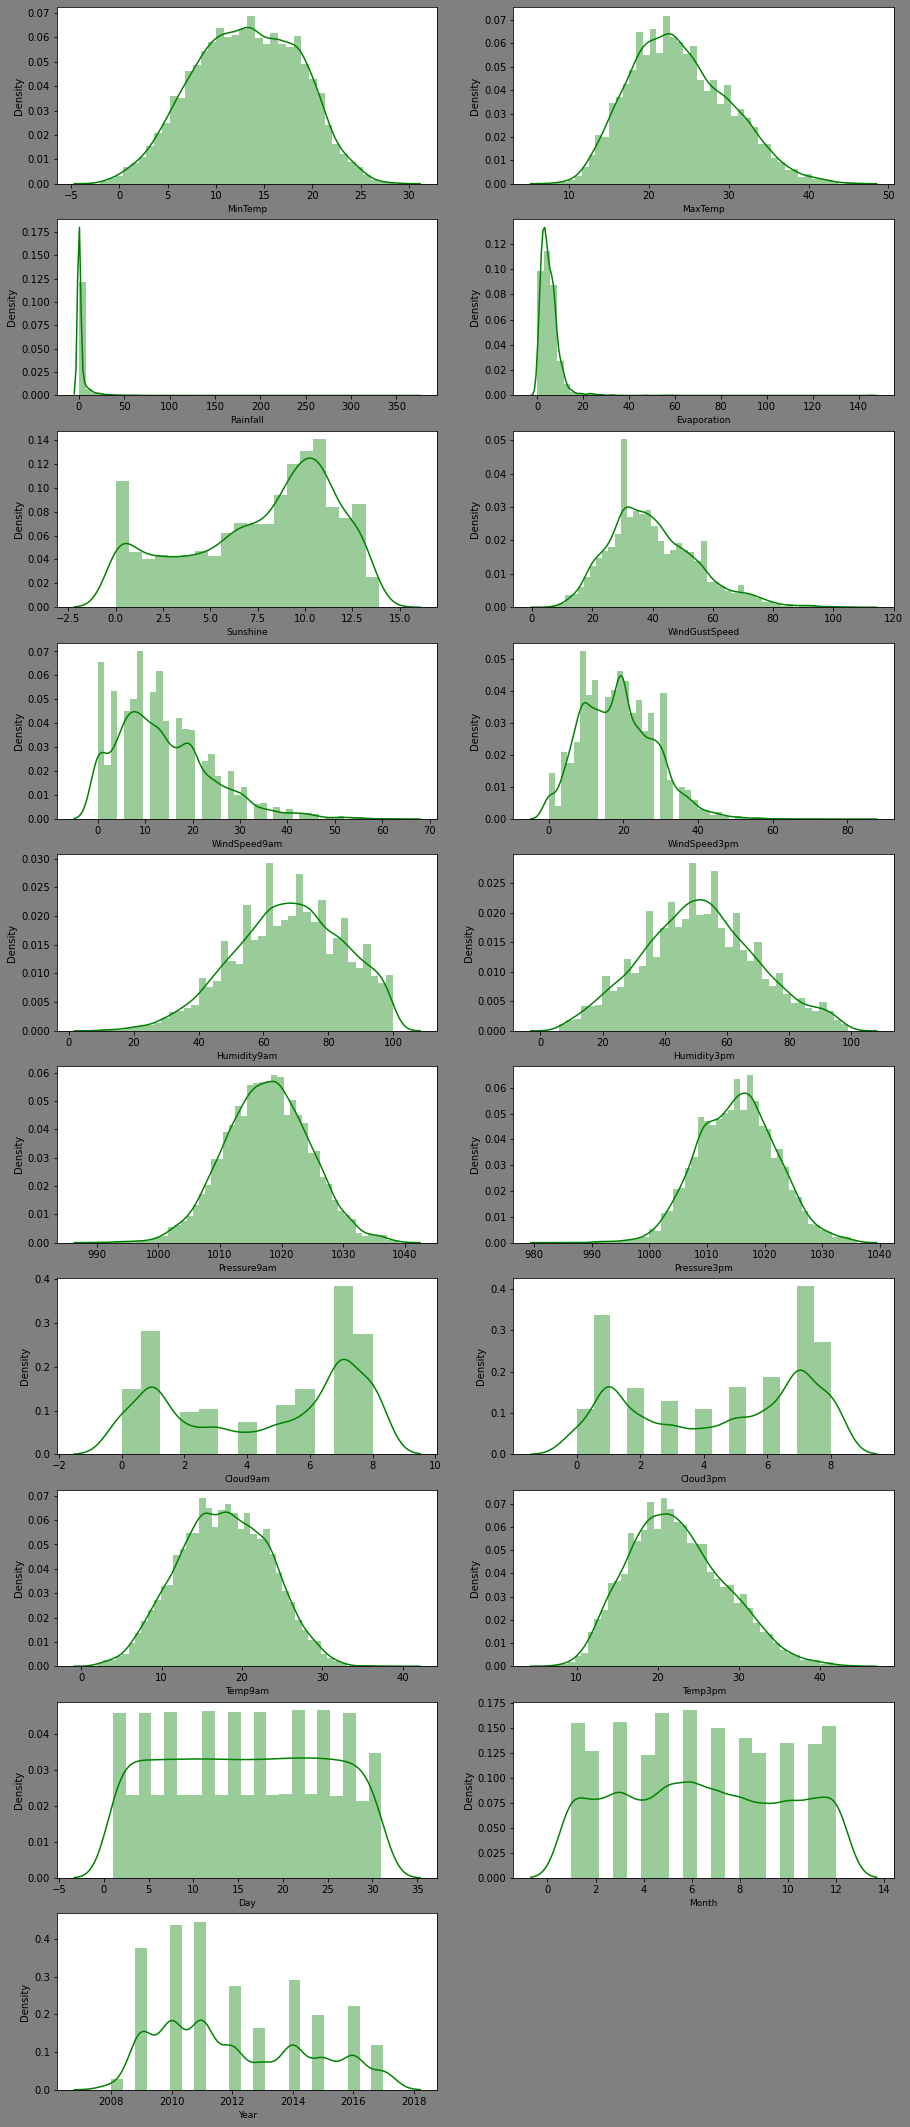

In [20]:
plt.figure(figsize=(15,50),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes != 'object':
        if plotnumber<=26:
            ax=plt.subplot(13,2,plotnumber)
            sns.distplot(data[column],color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

In [21]:
#Bivariate

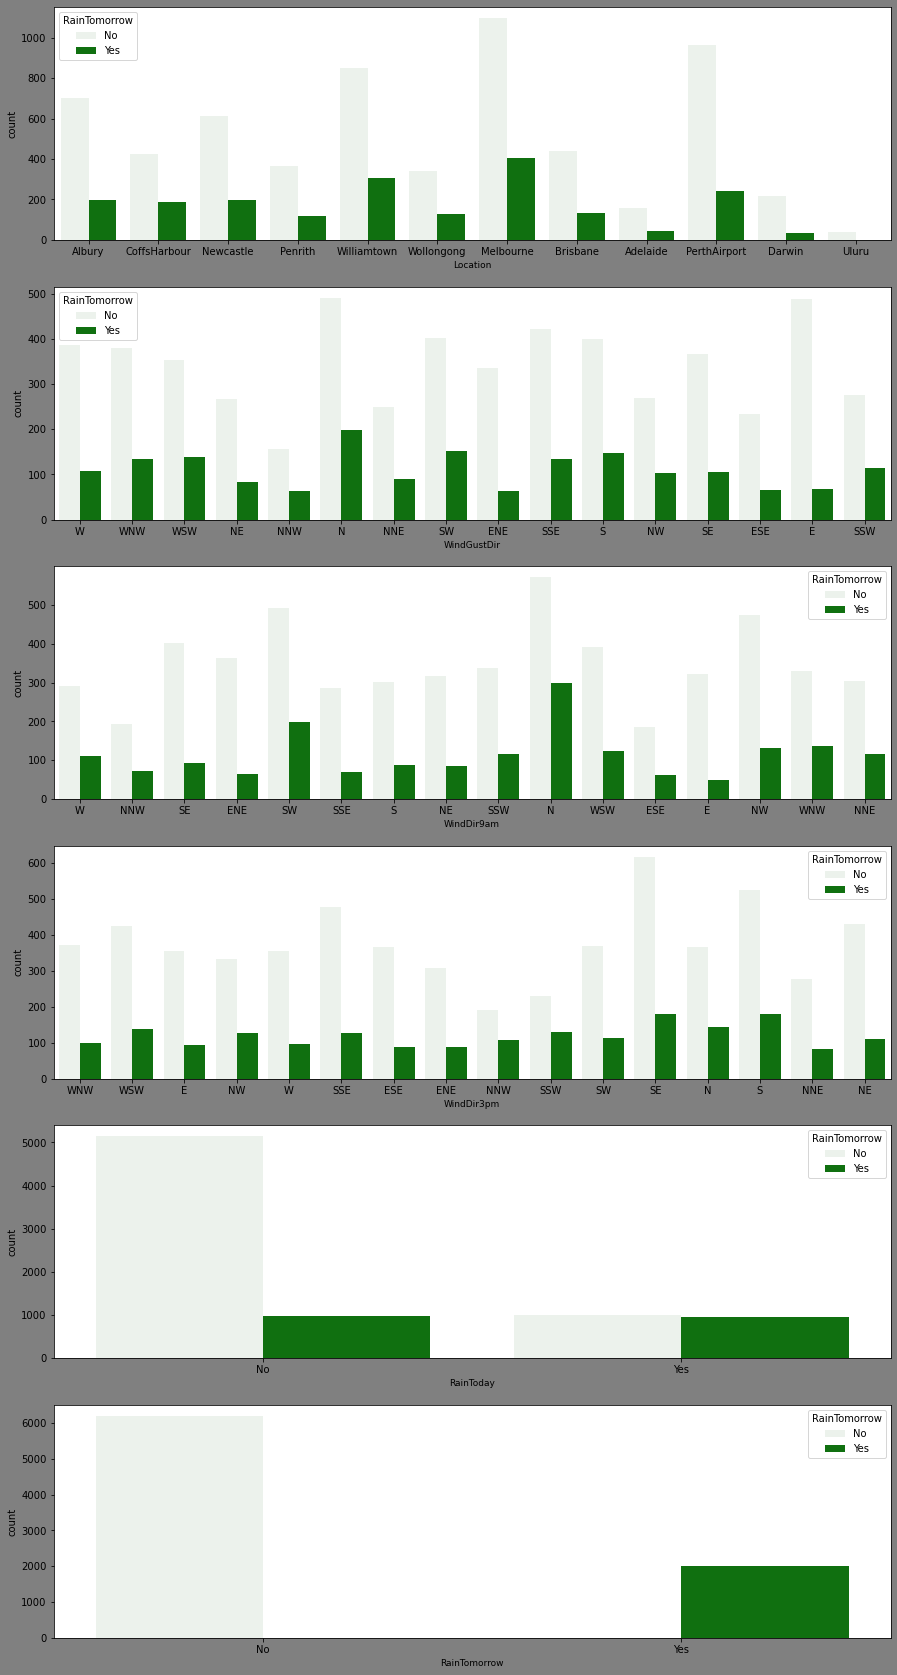

In [22]:
plt.figure(figsize=(15,30),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes == 'object':
        if plotnumber<=6:
            ax=plt.subplot(6,1,plotnumber)
            sns.countplot(data[column],hue = data['RainTomorrow'], color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

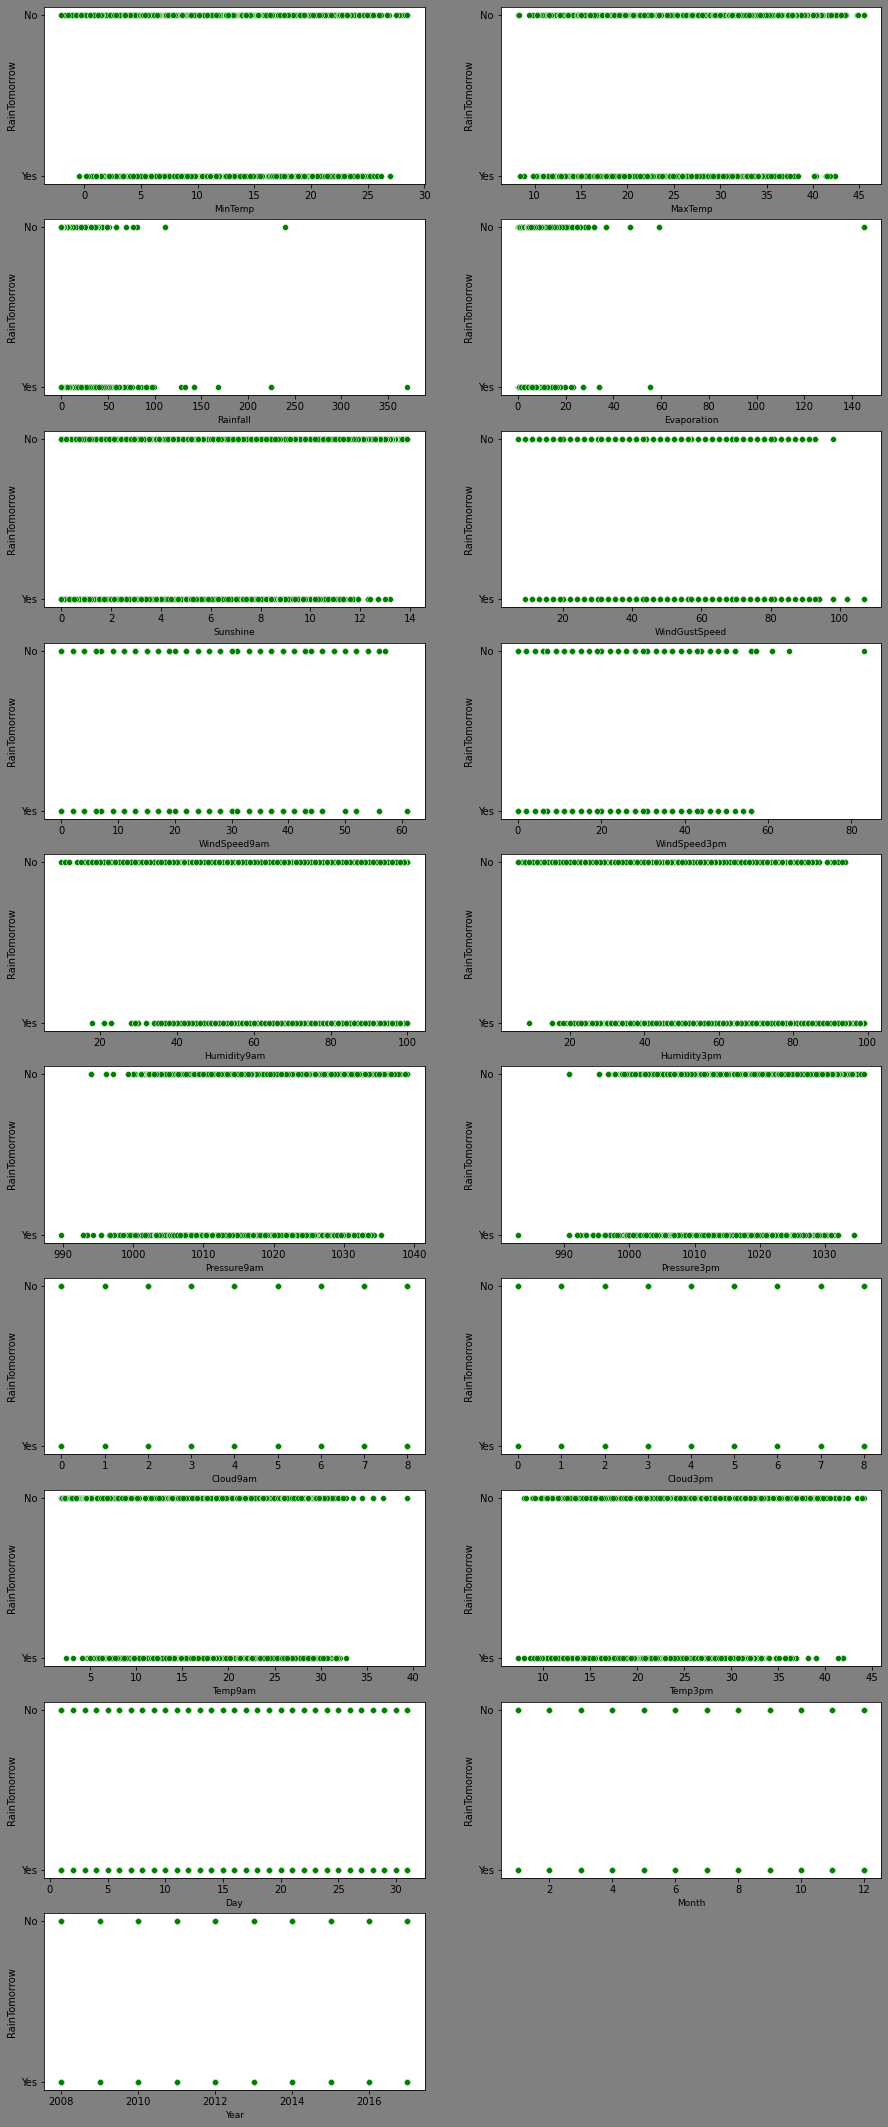

In [23]:
plt.figure(figsize=(15,50),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes != 'object':
        if plotnumber<=26:
            ax=plt.subplot(13,2,plotnumber)
            sns.scatterplot(data[column],data['RainTomorrow'],color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

In [24]:
# Treating NaNs

In [25]:
data.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64

In [26]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [27]:
mean = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
median = ['Cloud9am', 'Cloud3pm']
mode = []
for i in data.columns:
    if data[i].dtypes == 'object':
        mode.append(i)


In [28]:
mode

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [29]:
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine'] = data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [30]:
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].median())
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].median())

In [31]:
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [32]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [33]:
# encoding categorical variables

In [34]:
from sklearn.preprocessing import OrdinalEncoder
for i in data.columns:
    if data[i].dtypes == 'object':
        enco = OrdinalEncoder(categories=[data[i].unique()])
        data[i] = enco.fit_transform(data[[i]])

In [35]:
for i in data.columns:
    print(f"{i} = {data[i].unique()} \n {data[i].value_counts()}\n\n")

Location = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.] 
 6.0     1622
4.0     1230
9.0     1204
0.0      907
2.0      822
1.0      611
7.0      579
3.0      482
5.0      474
10.0     250
8.0      205
11.0      39
Name: Location, dtype: int64


MinTemp = [13.4         7.4        12.9         9.2        17.5        14.6
 14.3         7.7         9.7        13.1        15.9        12.6
  8.4         9.8        14.1        13.5        11.2        11.5
 17.1        20.5        15.3        16.2        16.9        20.1
 19.7        12.5        12.         11.3         9.6        10.5
 12.3        13.7        16.1        14.         17.         17.3
 17.2        17.4        19.8        14.9        13.9        18.6
 19.3        24.4        18.8        20.8        15.7        18.5
 20.4        21.8        22.3        22.         28.         21.5
 21.7        23.5        28.3        18.4        12.4        13.3
 18.         18.7        15.5         8.9        15.         15.4
 16.         1

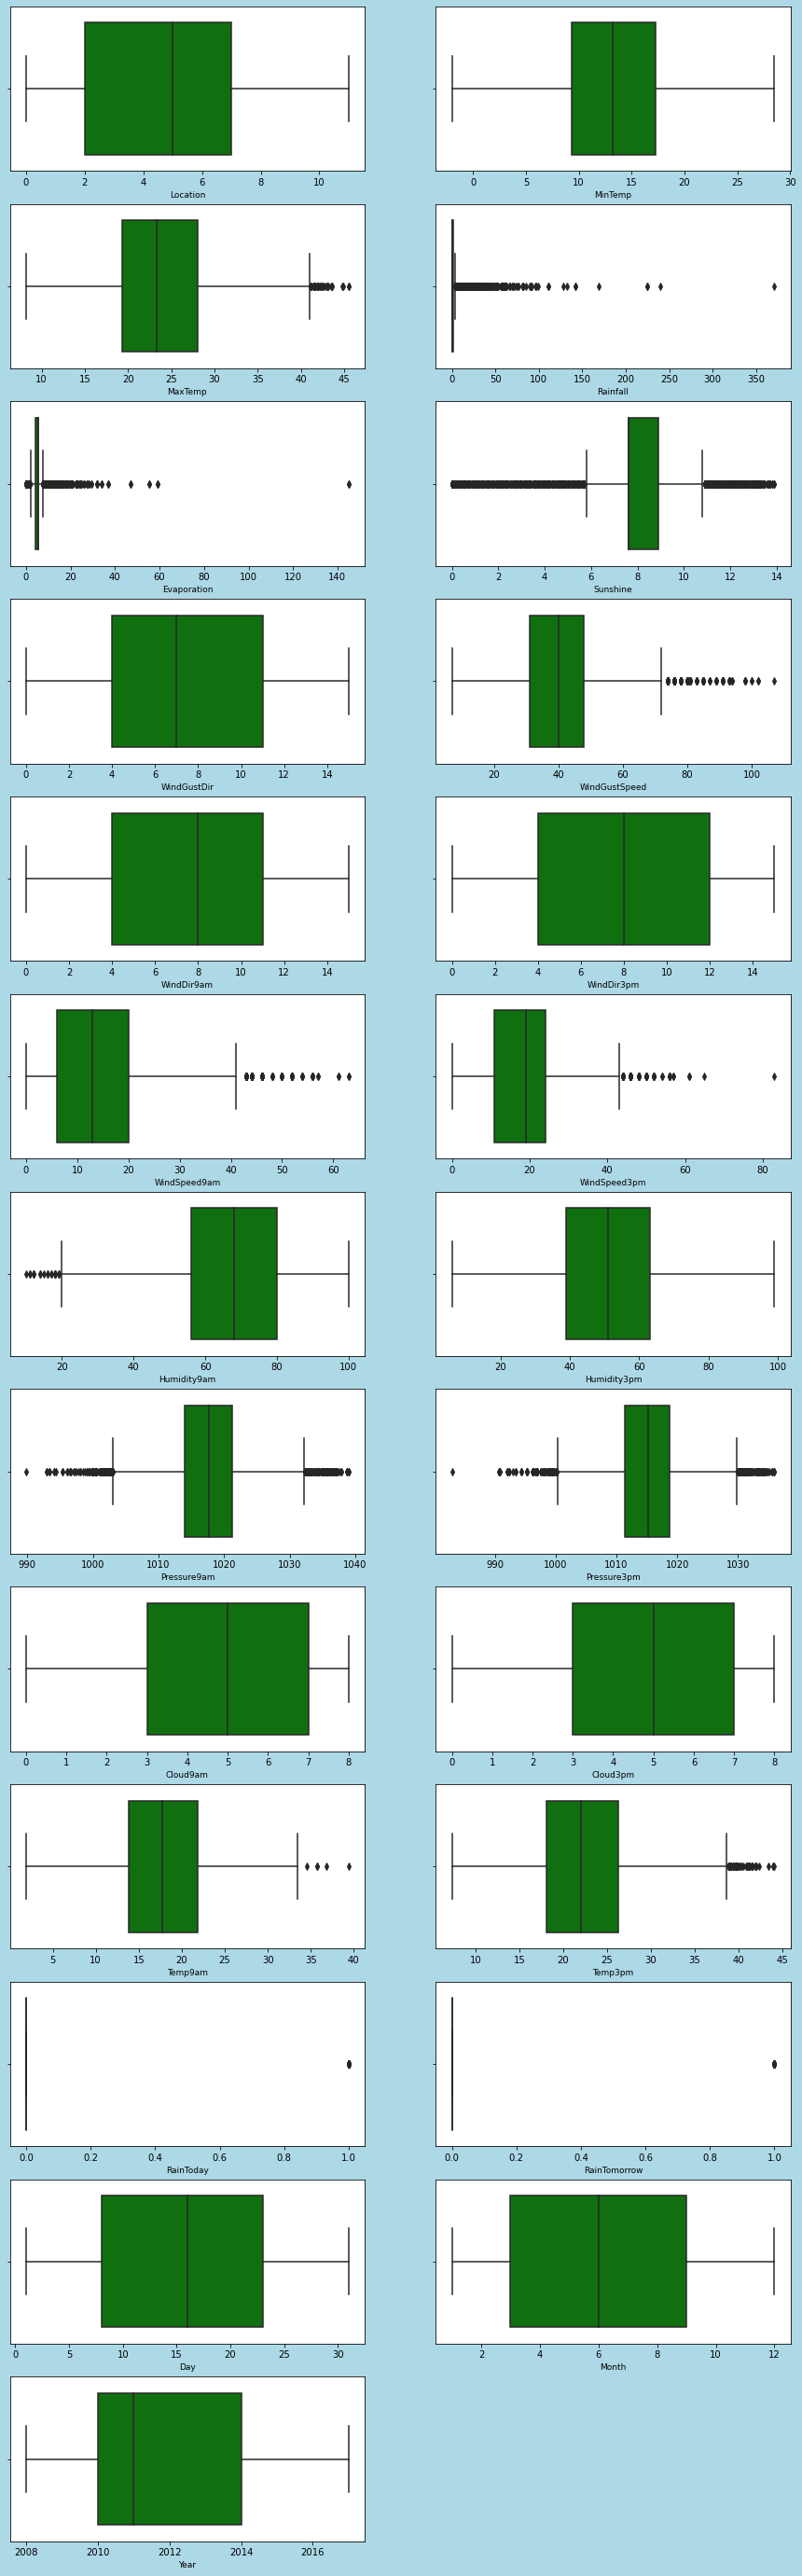

In [36]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=26:
        ax=plt.subplot(13,2,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [37]:
# Handling outliers 

In [38]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [39]:
Sunshine_high = q3.Sunshine + (1.5 * (iqr.Sunshine))
Sunshine_low = q1.Sunshine - (1.5 * (iqr.Sunshine))
Drop_Sunshine = np.where((data.Sunshine > Sunshine_high) | (data.Sunshine < Sunshine_low) )
Drop_Sunshine
data = data.drop(data.index[Drop_Sunshine])
data.shape

(6089, 25)

In [40]:
Pressure9am_high = q3.Pressure9am + (1.5 * (iqr.Pressure9am))
Pressure9am_low = q1.Pressure9am - (1.5 * (iqr.Pressure9am))
Drop_Pressure9am = np.where((data.Pressure9am > Pressure9am_high) | (data.Pressure9am < Pressure9am_low) )
Drop_Pressure9am
data = data.drop(data.index[Drop_Pressure9am])
data.shape

(5932, 25)

In [41]:
Pressure3pm_high = q3.Pressure3pm + (1.5 * (iqr.Pressure3pm))
Pressure3pm_low = q1.Pressure3pm - (1.5 * (iqr.Pressure3pm))
Drop_Pressure3pm = np.where((data.Pressure3pm > Pressure3pm_high) | (data.Pressure3pm < Pressure3pm_low) )
Drop_Pressure3pm
data = data.drop(data.index[Drop_Pressure3pm])
data.shape

(5902, 25)

In [42]:
Temp3pm_high = q3.Temp3pm + (1.5 * (iqr.Temp3pm))
Temp3pm_low = q1.Temp3pm - (1.5 * (iqr.Temp3pm))
Drop_Temp3pm = np.where((data.Temp3pm > Temp3pm_high) | (data.Temp3pm < Temp3pm_low) )
Drop_Temp3pm
data = data.drop(data.index[Drop_Temp3pm])
data.shape

(5862, 25)

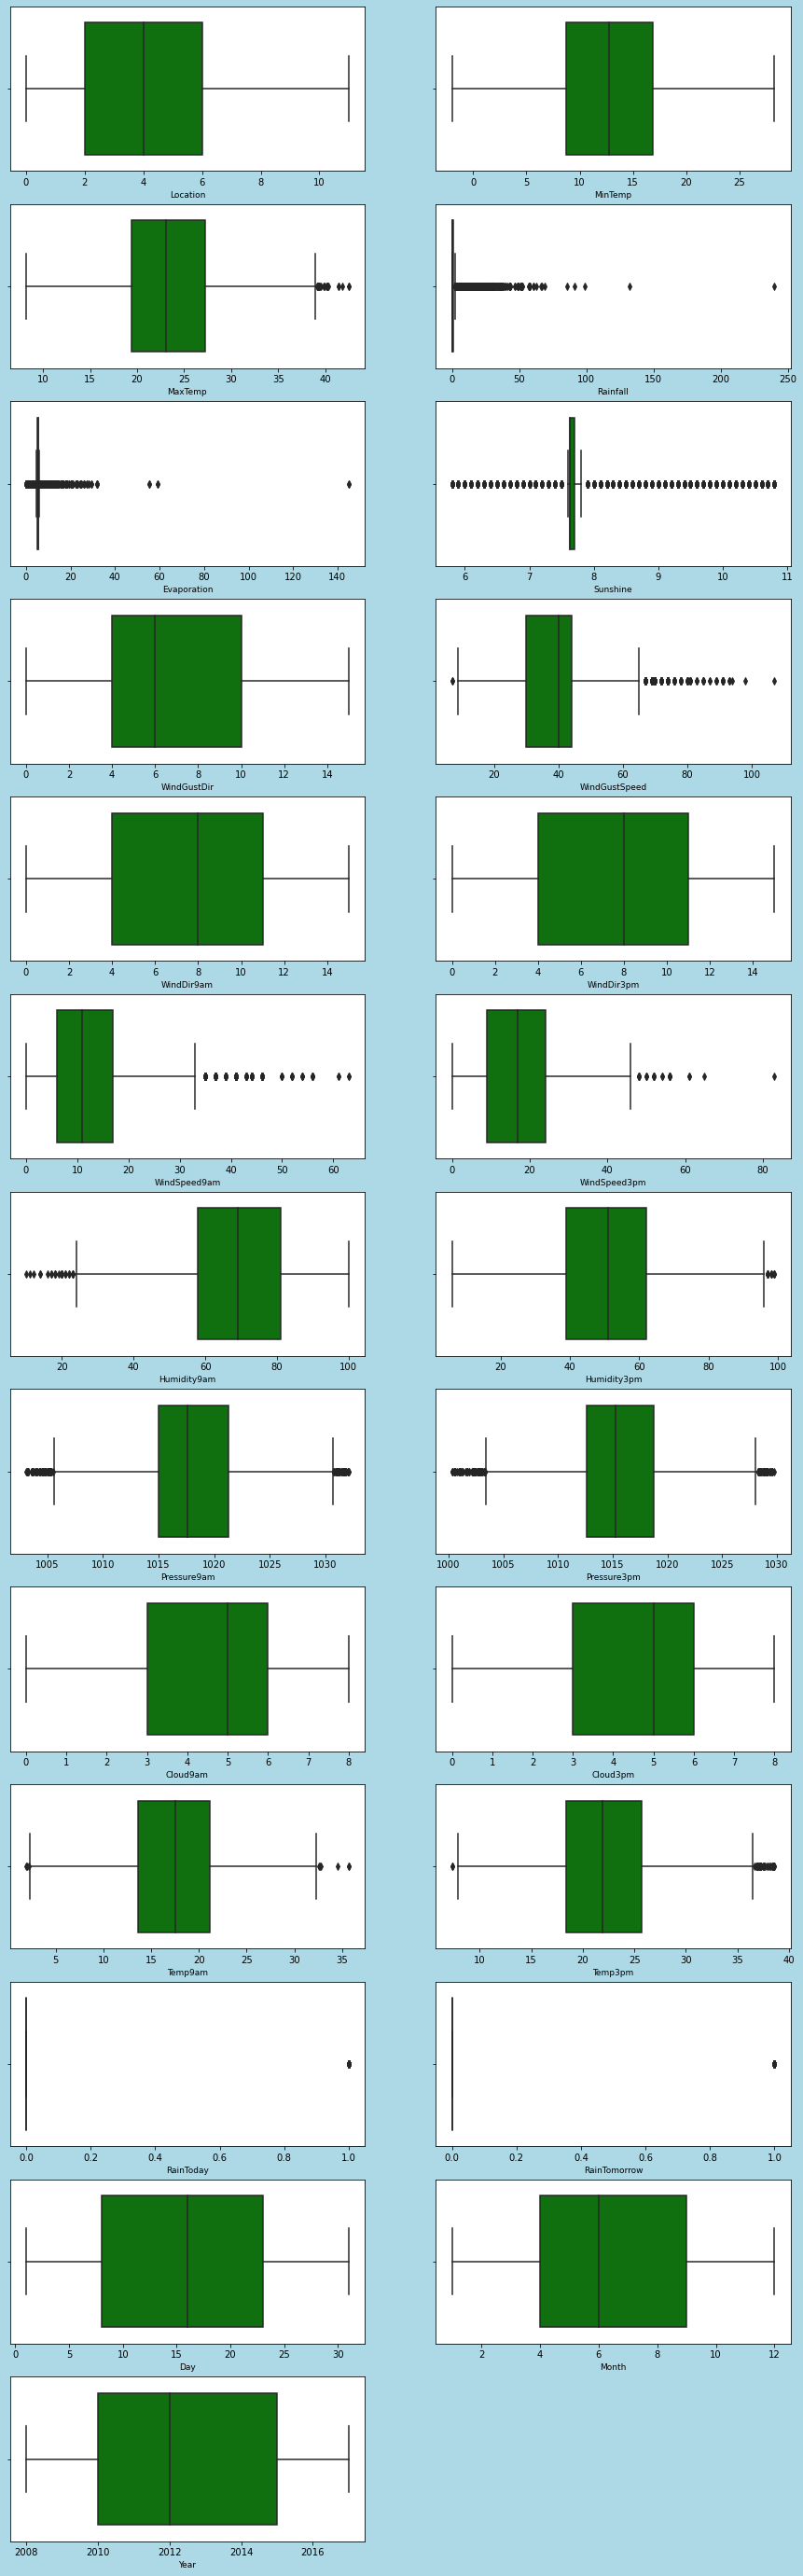

In [43]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=26:
        ax=plt.subplot(13,2,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [44]:
data2 = data

# Rain Tomorrow or Not

## Feature Selection

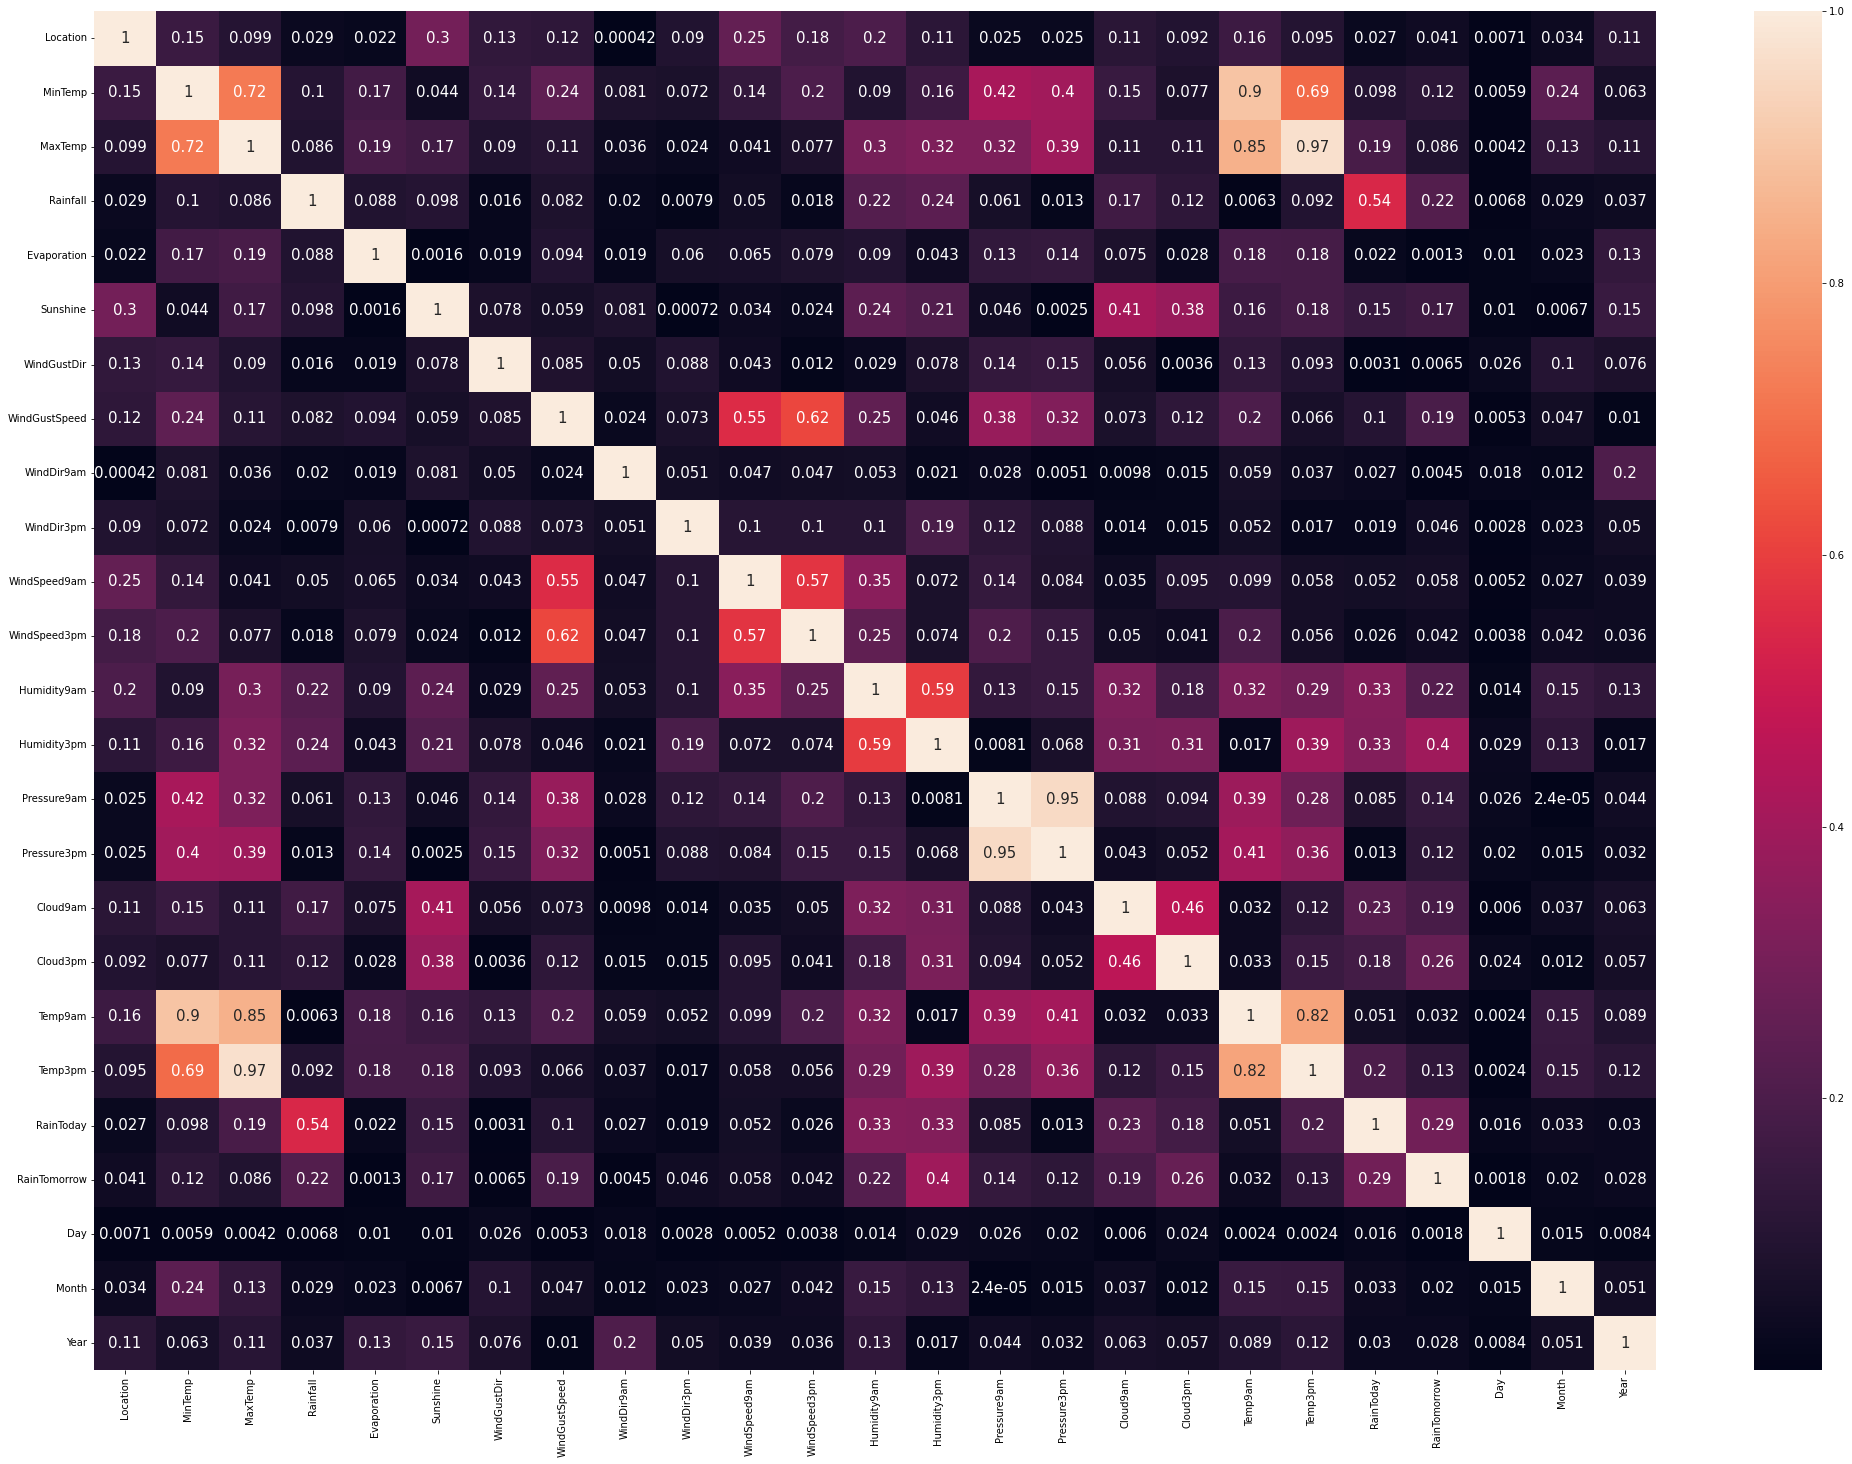

In [46]:
df_corr = data.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

<AxesSubplot:>

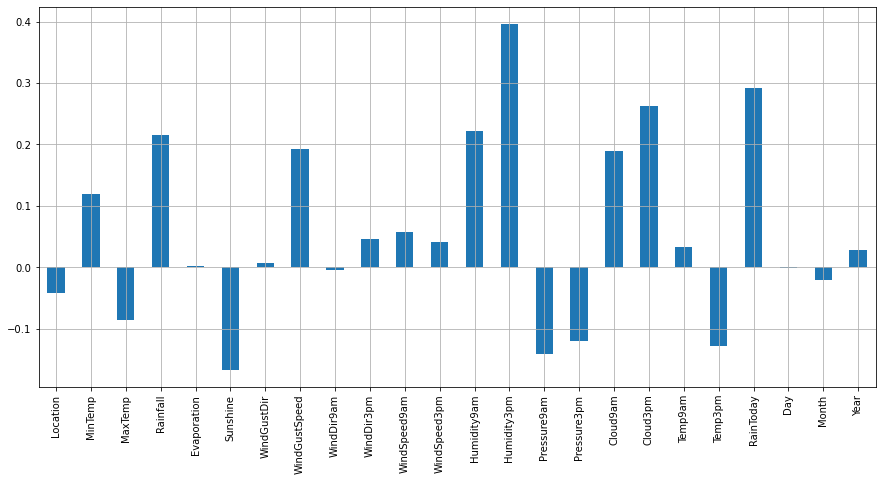

In [47]:
data.drop('RainTomorrow',axis =1).corrwith(data.RainTomorrow).plot(kind = 'bar', grid=True, figsize = (15,7))

In [48]:
# from the above two charts, we are dropping some features as below:
# Day, Evaporation, WindGustDir, windDir9am, MaxTemp, Temp9am and Pressure3pm will e dropped

In [49]:
data = data.drop(columns = ['Day', 'Evaporation', 'WindGustDir', 'WindDir9am', 'MaxTemp', 'Temp9am', 'Pressure3pm'],axis = 1)

In [50]:
data.shape

(5862, 18)

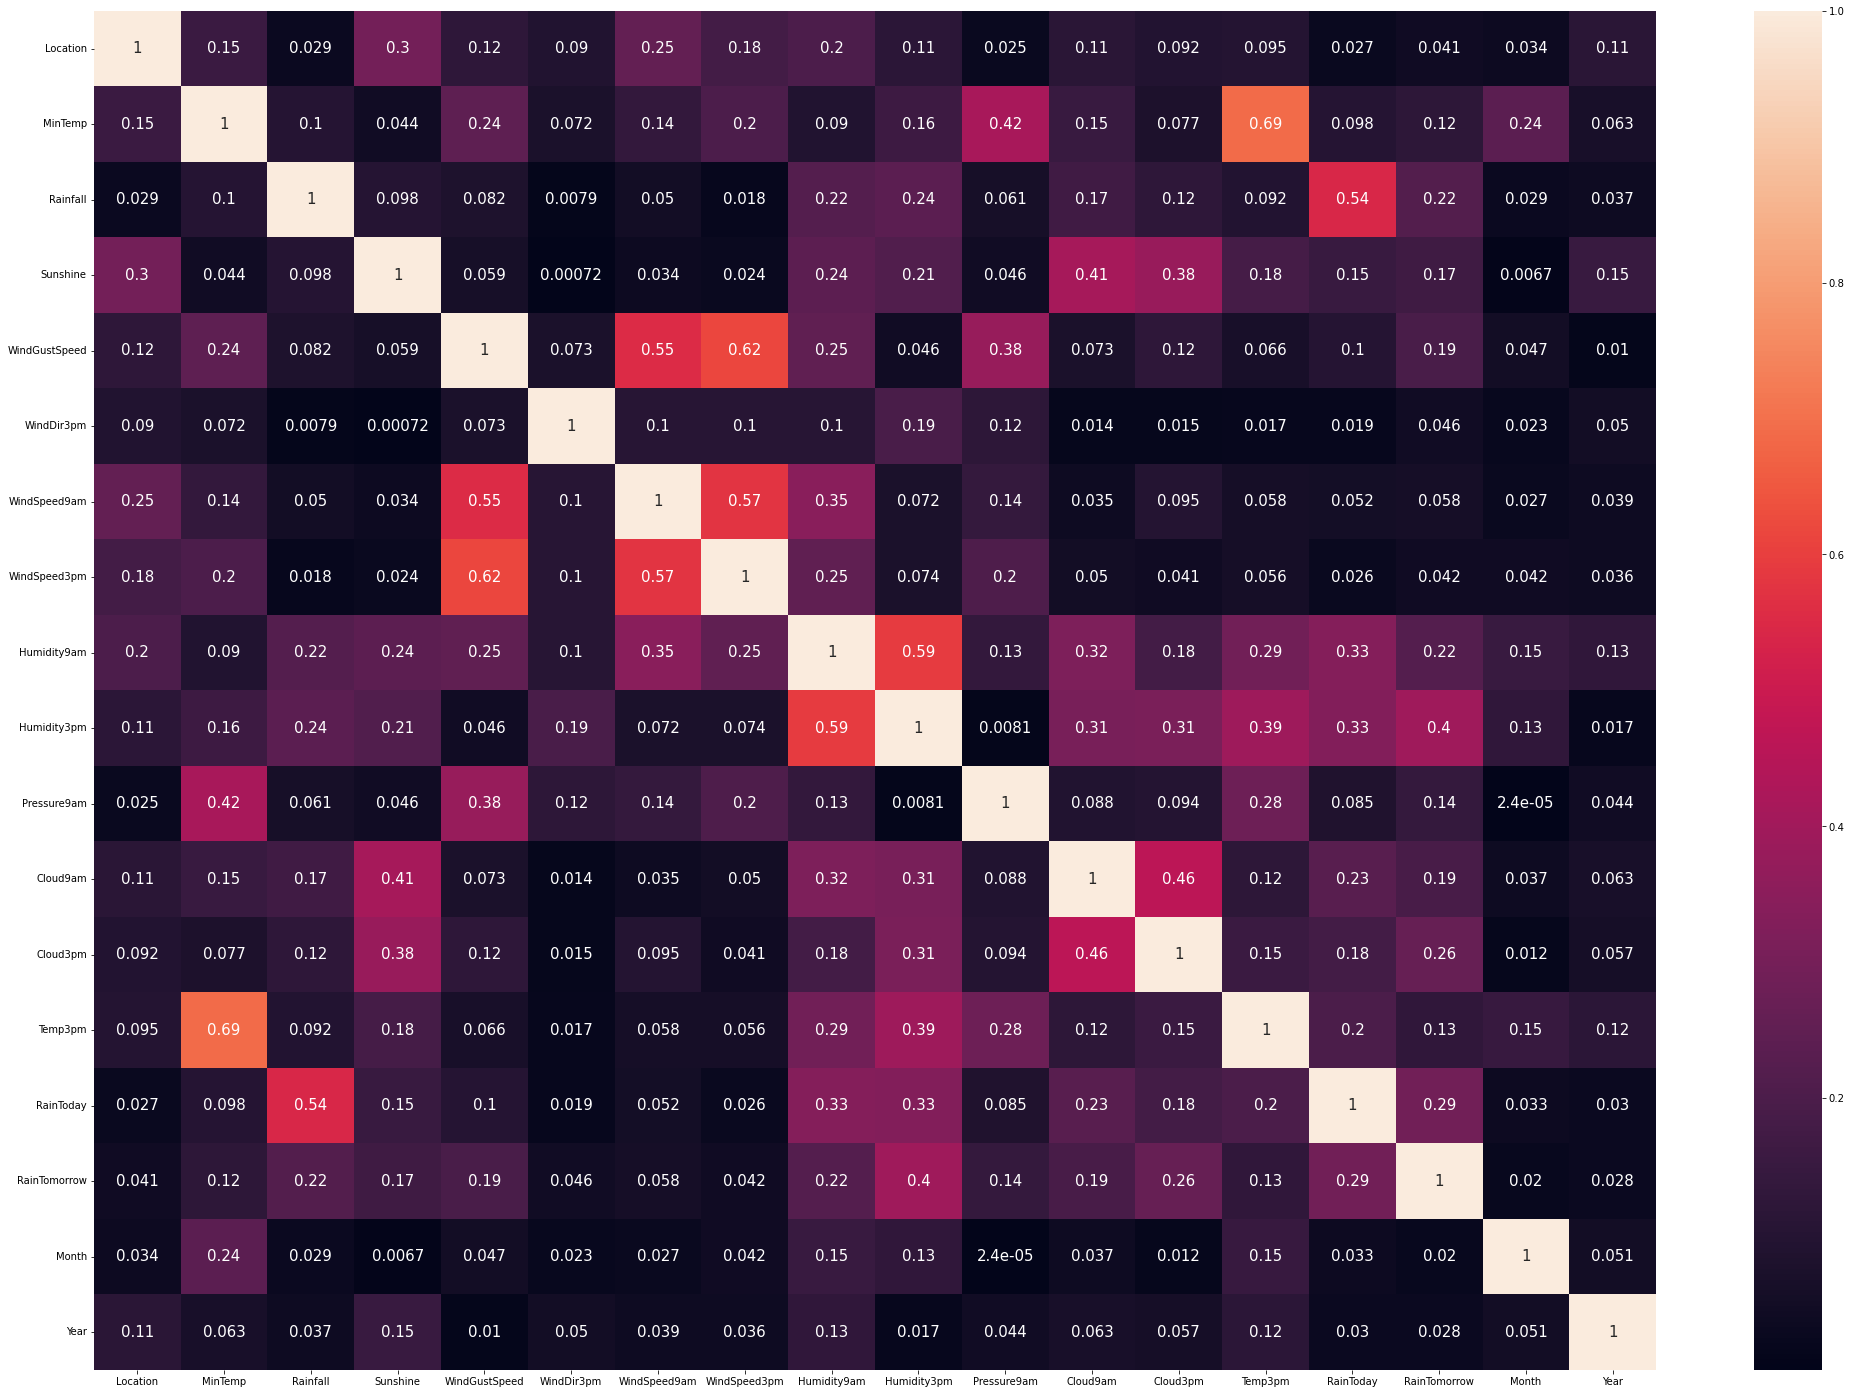

In [51]:
df_corr = data.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

In [52]:
# now, no feature not corelated more than 70%

In [53]:
data['RainTomorrow'].value_counts()

0.0    4598
1.0    1264
Name: RainTomorrow, dtype: int64

In [54]:
# Need to balance the data set

In [55]:
x = data.drop(columns = ['RainTomorrow'],axis =1)
y = data.RainTomorrow

In [56]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [57]:
balanced_x,balanced_y = smt.fit_resample(x, y)

In [58]:
balanced_x.shape, balanced_y.shape

((9196, 17), (9196,))

In [59]:
# Dataset has been balanced now

In [60]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
balanced_x_scaled = scale.fit_transform(balanced_x)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(balanced_x_scaled,i) for i in range(balanced_x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.255955,Location
1,5.247578,MinTemp
2,1.454293,Rainfall
3,1.360299,Sunshine
4,2.019718,WindGustSpeed
5,1.107245,WindDir3pm
6,2.064395,WindSpeed9am
7,1.986822,WindSpeed3pm
8,2.456957,Humidity9am
9,3.923626,Humidity3pm


In [62]:
#MinTemp and Temp3pm have VIF score more than 5.

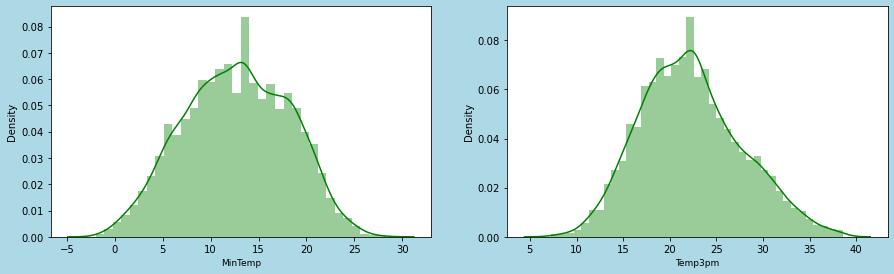

In [63]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in ['MinTemp', 'Temp3pm']:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

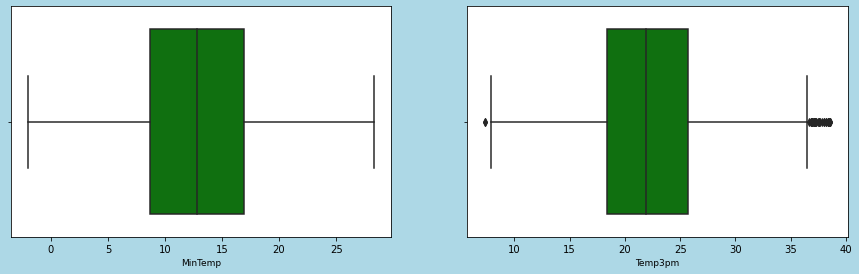

In [64]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in ['MinTemp', 'Temp3pm']:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

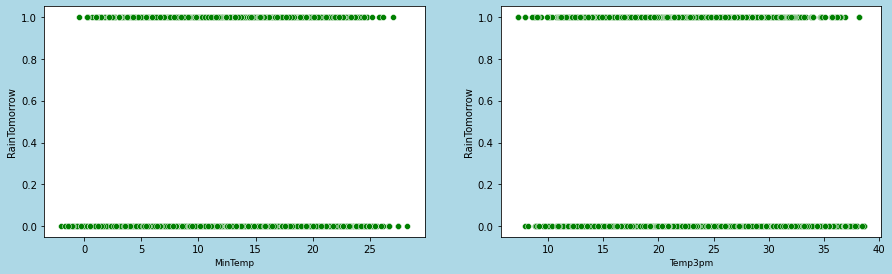

In [65]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in ['MinTemp', 'Temp3pm']:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.scatterplot(data[column],data['RainTomorrow'], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [66]:
# No need to treat MinTemp and Temp3pm.

## selection of Random state

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LogisticRegression

In [68]:
lg = LogisticRegression()

In [69]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(balanced_x_scaled,balanced_y,train_size = 0.75,random_state = i)
    lg.fit(x_train, y_train)
    predict_train = lg.predict(x_train)
    predict_test = lg.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{accuracy_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{accuracy_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.7539509931854429}
At random state 0, the test set accuracy is  {0.7390169638973467}
At random state 1, the train set accuracy is  {0.7432216905901117}
At random state 1, the test set accuracy is  {0.7642453240539365}
At random state 2, the train set accuracy is  {0.7488763230390024}
At random state 2, the test set accuracy is  {0.7464114832535885}
At random state 3, the train set accuracy is  {0.7523560968537045}
At random state 3, the test set accuracy is  {0.743801652892562}
At random state 4, the train set accuracy is  {0.7401768885022474}
At random state 4, the test set accuracy is  {0.7690300130491518}
At random state 5, the train set accuracy is  {0.7519211251268667}
At random state 5, the test set accuracy is  {0.7433666811657242}
At random state 6, the train set accuracy is  {0.7494562853414528}
At random state 6, the test set accuracy is  {0.7368421052631579}
At random state 7, the train set accuracy is  {0.7548209366391184}
At 

In [70]:
# at random state 63, the model perfroms well.So random state is 63
x_train,x_test,y_train,y_test = train_test_split(balanced_x,balanced_y,train_size = 0.75,random_state = 63)
lg.fit(x_train, y_train)
predict_train = lg.predict(x_train)
predict_test = lg.predict(x_test)
print(f"The train set accuracy is ",{accuracy_score(y_train,predict_train)})
print(f"The test set accuracy is ",{accuracy_score(y_test,predict_test)})

The train set accuracy is  {0.7372770769899957}
The test set accuracy is  {0.7259678120922141}


In [71]:
#Model

In [72]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('Accuracy:', accuracy_score(y_train, train_pred)*100,'% \n')
        print("\n Test Classification Report -\n", classification_report(y_train, train_pred, digits = 2))
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('Accuracy:', accuracy_score(y_test, test_pred)*100,'%\n')
        print("\n Test Classification Report -\n", classification_report(y_test, test_pred, digits = 2))

In [73]:
#logistic regression
metric_score(lg,x_train,x_test,y_train,y_test, train = True)
metric_score(lg,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 73.72770769899957 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.72      0.77      0.75      3465
         1.0       0.75      0.70      0.73      3432

    accuracy                           0.74      6897
   macro avg       0.74      0.74      0.74      6897
weighted avg       0.74      0.74      0.74      6897


===================Test Results============
Accuracy: 72.5967812092214 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.73      1133
         1.0       0.75      0.70      0.72      1166

    accuracy                           0.73      2299
   macro avg       0.73      0.73      0.73      2299
weighted avg       0.73      0.73      0.73      2299



In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [75]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gbr = GradientBoostingClassifier()

In [76]:
# Random Forest
metric_score(rf,x_train,x_test,y_train,y_test, train = True)
metric_score(rf,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 99.92750471219371 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3465
         1.0       1.00      1.00      1.00      3432

    accuracy                           1.00      6897
   macro avg       1.00      1.00      1.00      6897
weighted avg       1.00      1.00      1.00      6897


===================Test Results============
Accuracy: 93.38842975206612 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      1133
         1.0       0.94      0.93      0.93      1166

    accuracy                           0.93      2299
   macro avg       0.93      0.93      0.93      2299
weighted avg       0.93      0.93      0.93      2299



In [77]:
# Decision Tree
metric_score(dt,x_train,x_test,y_train,y_test, train = True)
metric_score(dt,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 99.92750471219371 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3465
         1.0       1.00      1.00      1.00      3432

    accuracy                           1.00      6897
   macro avg       1.00      1.00      1.00      6897
weighted avg       1.00      1.00      1.00      6897


===================Test Results============
Accuracy: 87.03784254023489 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1133
         1.0       0.86      0.89      0.87      1166

    accuracy                           0.87      2299
   macro avg       0.87      0.87      0.87      2299
weighted avg       0.87      0.87      0.87      2299



In [78]:
#knn
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 90.09714368566043 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      3465
         1.0       0.85      0.98      0.91      3432

    accuracy                           0.90      6897
   macro avg       0.91      0.90      0.90      6897
weighted avg       0.91      0.90      0.90      6897


===================Test Results============
Accuracy: 85.34145280556764 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.95      0.74      0.83      1133
         1.0       0.79      0.96      0.87      1166

    accuracy                           0.85      2299
   macro avg       0.87      0.85      0.85      2299
weighted avg       0.87      0.85      0.85      2299



In [79]:
# Gradient Boost 
metric_score(gbr,x_train,x_test,y_train,y_test, train = True)
metric_score(gbr,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 87.26982746121502 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      3465
         1.0       0.89      0.85      0.87      3432

    accuracy                           0.87      6897
   macro avg       0.87      0.87      0.87      6897
weighted avg       0.87      0.87      0.87      6897


===================Test Results============
Accuracy: 86.73336233144846 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1133
         1.0       0.88      0.86      0.87      1166

    accuracy                           0.87      2299
   macro avg       0.87      0.87      0.87      2299
weighted avg       0.87      0.87      0.87      2299



## Cross Validation

In [80]:
from sklearn.model_selection import KFold,cross_val_score

In [81]:
cross_val_score(lg,balanced_x_scaled, balanced_y, cv = 5).mean()

0.6396238503912807

In [82]:
cross_val_score(rf,balanced_x_scaled, balanced_y, cv = 5).mean()

0.66096052911554

In [83]:
cross_val_score(knn,balanced_x_scaled, balanced_y, cv = 5).mean()

0.6558403669290966

In [84]:
cross_val_score(dt,balanced_x_scaled, balanced_y, cv = 5).mean()

0.6238722013381564

In [85]:
cross_val_score(gbr,balanced_x_scaled, balanced_y, cv = 5).mean()

0.5385110646145116

In [86]:
# Random Forest gives the high accuracy SO this model has been selected as final model

## Hyperparameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid_param= {'n_estimators': [200, 400, 600, 800, 1000],
             'max_features':['auto','sqrt','log2'] ,
             'max_depth':[60,70,80,90,100],
             'min_samples_split':[1,2,3],
             'min_samples_leaf':[1,3,4,],
             }

In [ ]:
grid = GridSearchCV(rf, param_grid = grid_param)
grid.fit(x_train, y_train)

In [ ]:
best = grid.best_params_
best

In [90]:
grid_final_model = RandomForestClassifier(n_estimators=400, min_samples_leaf=1, min_samples_split=2,
                                          max_depth=100, max_features= 'sqrt')

In [91]:
grid_final_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=400)

In [92]:
metric_score(grid_final_model,x_train,x_test,y_train,y_test, train = True)
metric_score(grid_final_model,x_train,x_test,y_train,y_test, train = False)


===================Train Results============
Accuracy: 99.92750471219371 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3465
         1.0       1.00      1.00      1.00      3432

    accuracy                           1.00      6897
   macro avg       1.00      1.00      1.00      6897
weighted avg       1.00      1.00      1.00      6897


===================Test Results============
Accuracy: 93.86689865158765 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      1133
         1.0       0.94      0.94      0.94      1166

    accuracy                           0.94      2299
   macro avg       0.94      0.94      0.94      2299
weighted avg       0.94      0.94      0.94      2299



In [93]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

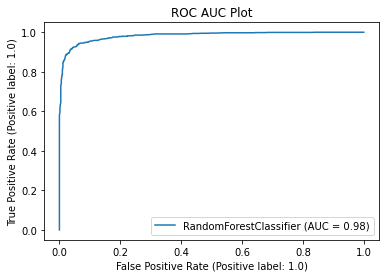

In [94]:
plot_roc_curve(grid_final_model,x_test,y_test)
plt.title('ROC AUC Plot')

In [95]:
# ROC AUC curve is 98% acheived

## saving the model

In [ ]:
filename = 'Rainfall prediction: Rain or not Tomorrow'
pickle.dump(grid_final_model,open(filename,'wb'))

In [98]:
filename = 'Rainfall prediction: Rain or not Tomorrow'
saved_mod = pickle.load(open(filename,'rb'))

In [99]:
saved_mod.predict(x_test)

array([0., 1., 1., ..., 0., 0., 1.])

In [100]:
y_test

5048    0.0
2798    1.0
7457    1.0
8149    1.0
4297    0.0
       ... 
950     0.0
6563    1.0
3977    0.0
145     0.0
7140    1.0
Name: RainTomorrow, Length: 2299, dtype: float64

In [101]:
#prediction is almost close to the actual

# How Much Rainfall could be there

In [102]:
data2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,0.0,13.4,22.900000,0.6,5.389395,7.632205,0.0,44.000000,0.0,0.0,...,1007.1,8.0,5.0,16.9,21.8,0.0,0.0,1,12,2008
1,0.0,7.4,25.100000,0.0,5.389395,7.632205,1.0,44.000000,1.0,1.0,...,1007.8,5.0,5.0,17.2,24.3,0.0,0.0,2,12,2008
2,0.0,12.9,25.700000,0.0,5.389395,7.632205,2.0,46.000000,0.0,1.0,...,1008.7,5.0,2.0,21.0,23.2,0.0,0.0,3,12,2008
3,0.0,9.2,28.000000,0.0,5.389395,7.632205,3.0,24.000000,2.0,2.0,...,1012.8,5.0,5.0,18.1,26.5,0.0,0.0,4,12,2008
4,0.0,17.5,32.300000,1.0,5.389395,7.632205,0.0,41.000000,3.0,3.0,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,11.0,2.8,23.400000,0.0,5.389395,7.632205,14.0,31.000000,2.0,7.0,...,1020.3,5.0,5.0,10.1,22.4,0.0,0.0,21,6,2017
8421,11.0,3.6,25.300000,0.0,5.389395,7.632205,4.0,22.000000,2.0,12.0,...,1019.1,5.0,5.0,10.9,24.5,0.0,0.0,22,6,2017
8422,11.0,5.4,26.900000,0.0,5.389395,7.632205,5.0,37.000000,2.0,0.0,...,1016.8,5.0,5.0,12.5,26.1,0.0,0.0,23,6,2017
8423,11.0,7.8,27.000000,0.0,5.389395,7.632205,12.0,28.000000,5.0,12.0,...,1016.5,3.0,2.0,15.1,26.0,0.0,0.0,24,6,2017


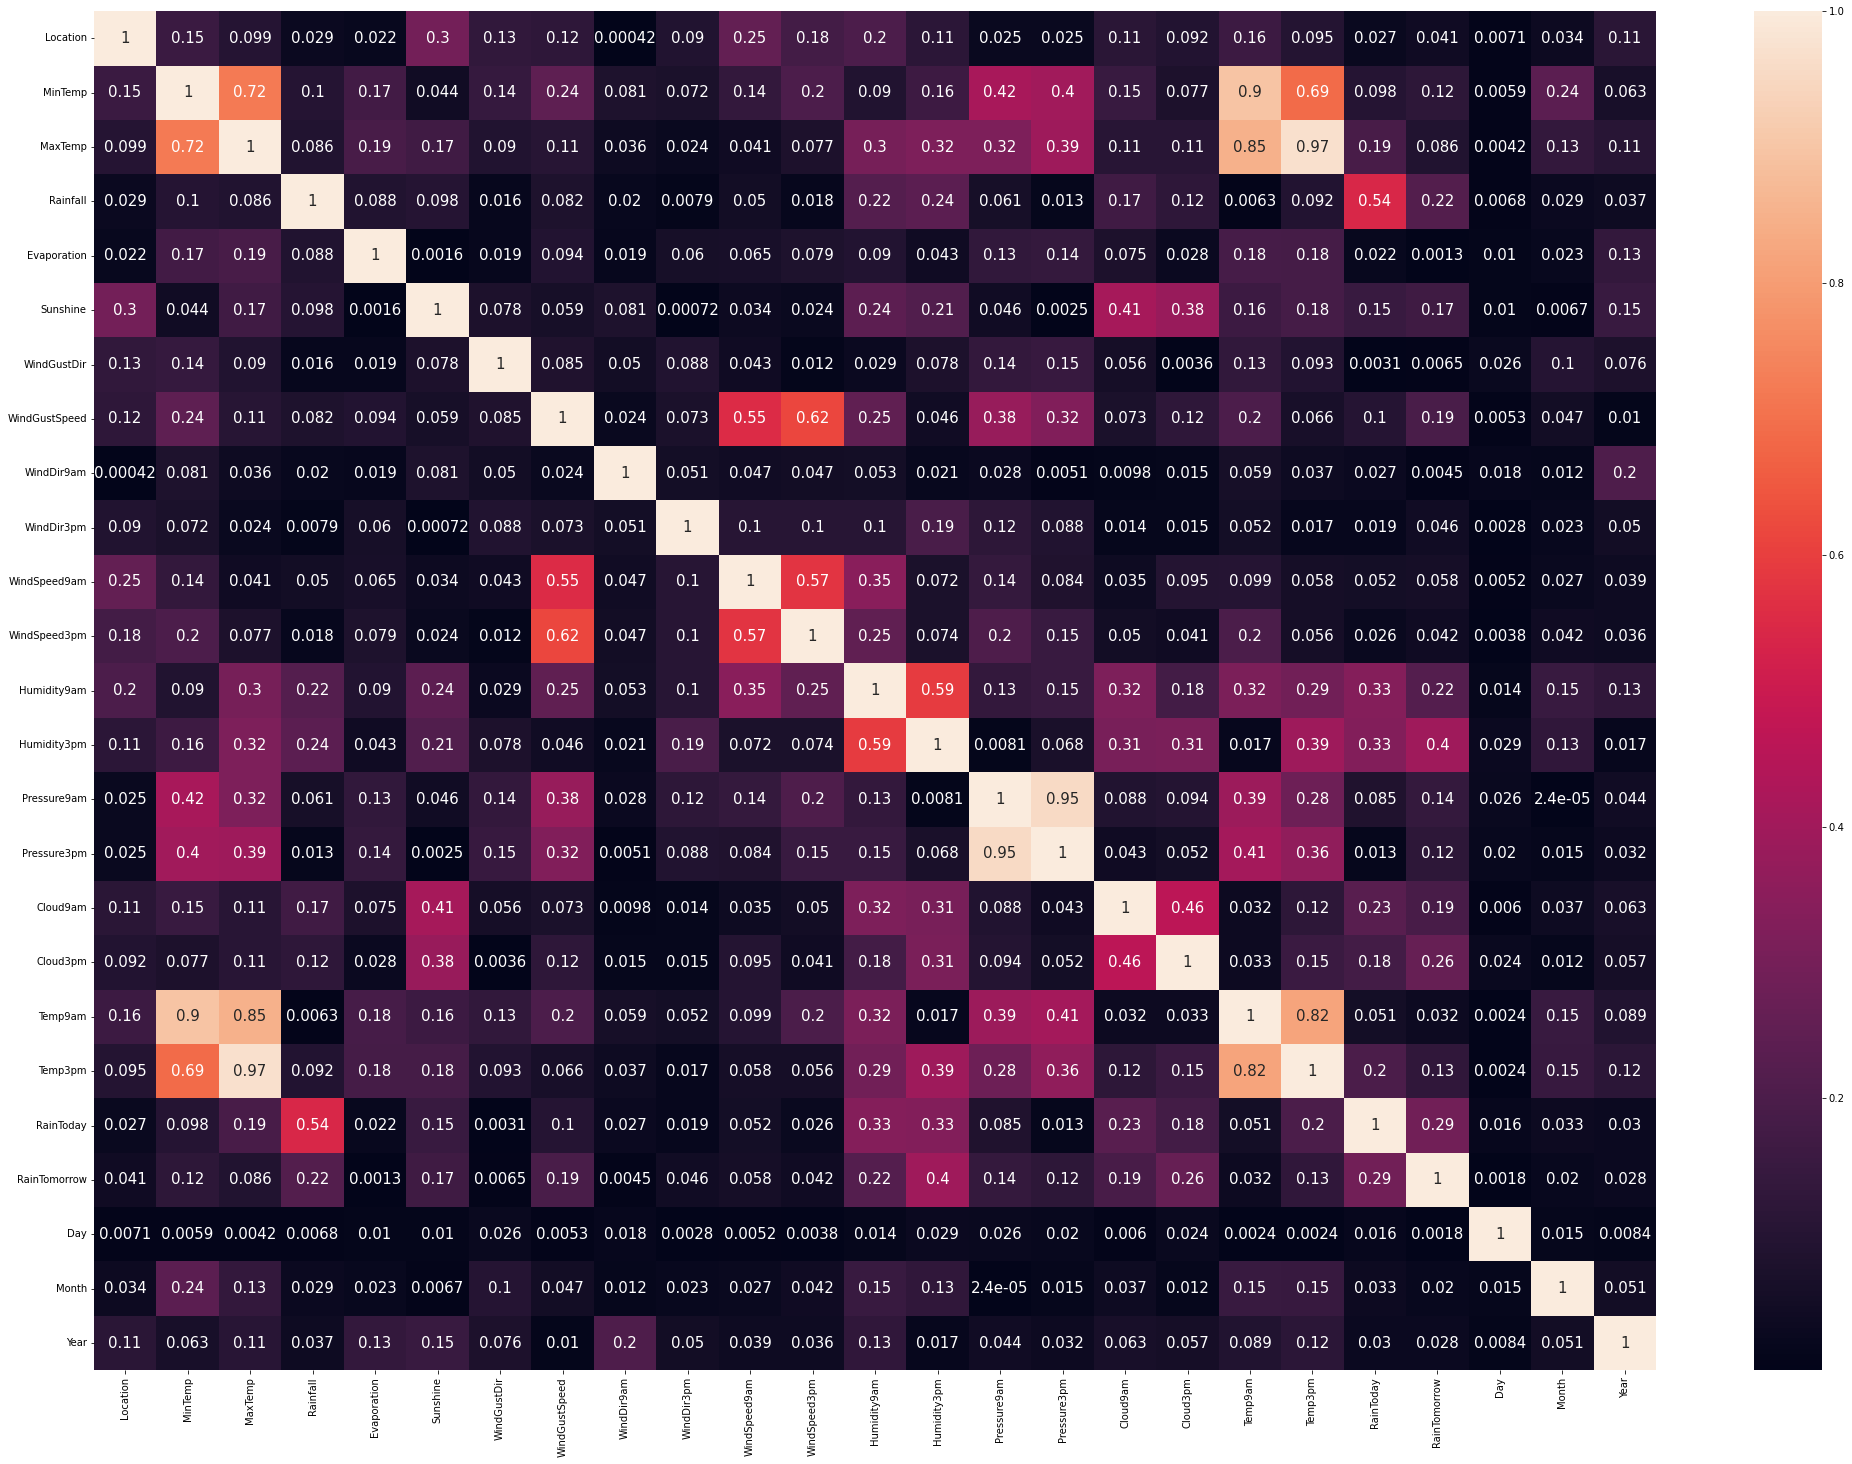

In [103]:
df_corr = data2.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

<AxesSubplot:>

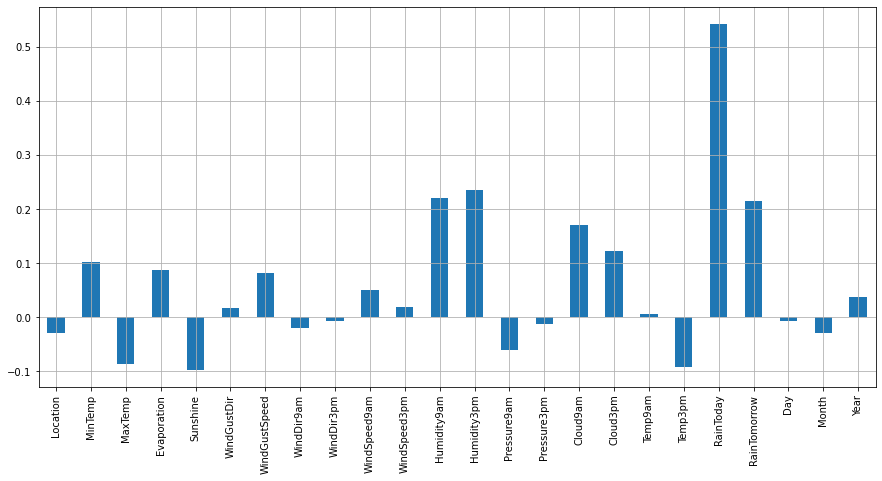

In [106]:
data2.drop('Rainfall',axis =1).corrwith(data2.Rainfall).plot(kind = 'bar', grid=True, figsize = (15,7))

In [107]:
# from the above two charts, we are dropping some features as below:
# MaxTemp, Temp3pm, Temp9am, Day, Pressure3pm, WindDir3pm will e dropped

In [108]:
data2 = data2.drop(columns = ['MaxTemp', 'Temp3pm', 'Temp9am', 'Day', 'Pressure3pm', 'WindDir3pm'], axis =1)

In [109]:
data2.shape

(5862, 19)

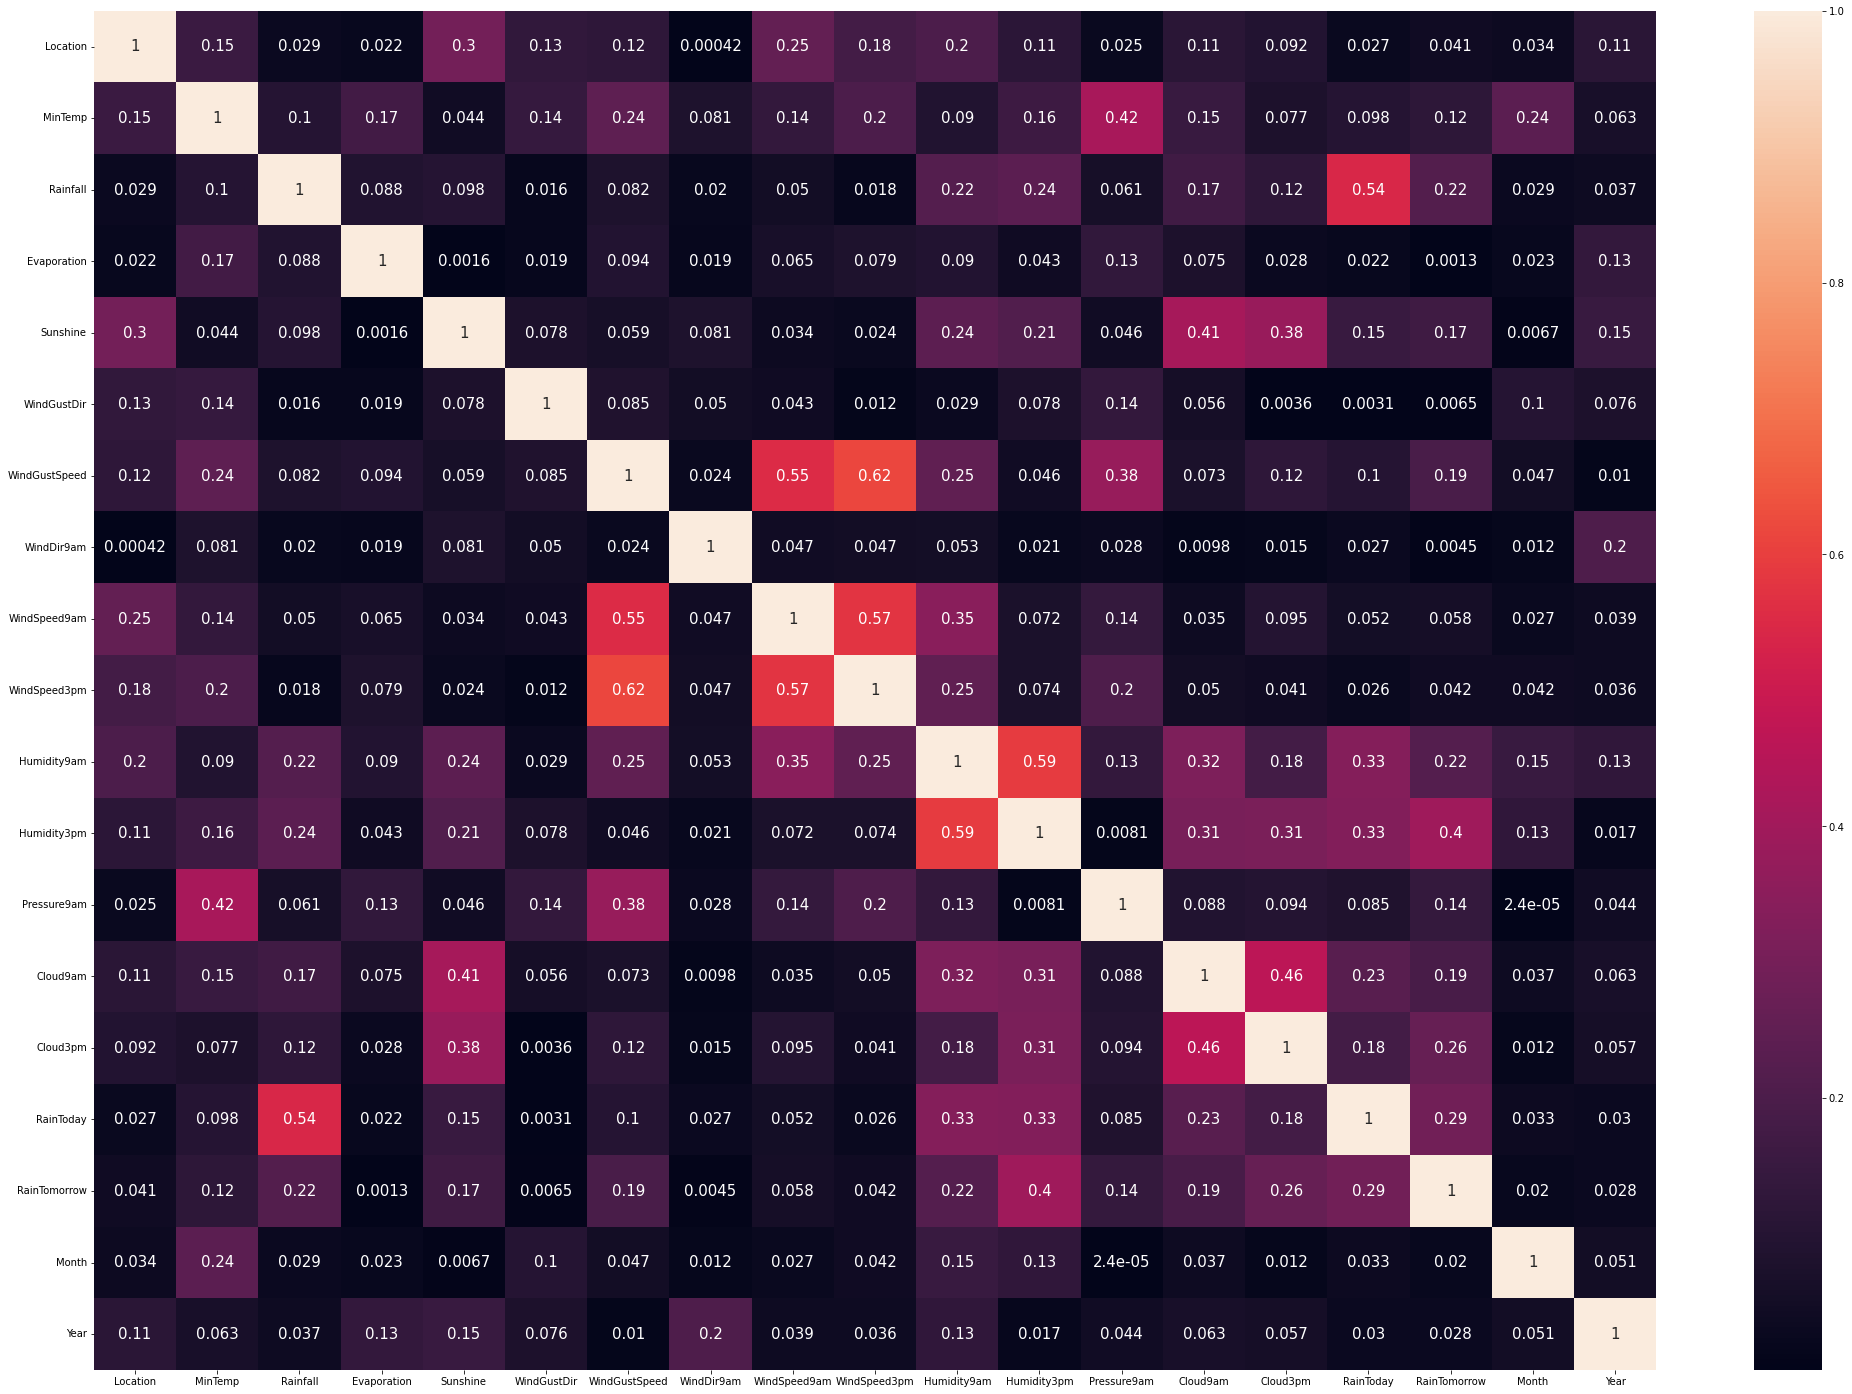

In [110]:
df_corr = data2.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

In [111]:
# now, no feature have more than 70% corelation.

In [112]:
x = data2.drop(columns = ['Rainfall'],axis =1)
y = data2.Rainfall

In [113]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.270573,Location
1,1.589088,MinTemp
2,1.082022,Evaporation
3,1.460294,Sunshine
4,1.110987,WindGustDir
5,2.126923,WindGustSpeed
6,1.072724,WindDir9am
7,1.893977,WindSpeed9am
8,1.893741,WindSpeed3pm
9,2.228047,Humidity9am


In [115]:
#NO feature have VIF Score more than 5.

## selection of Random state

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression

In [118]:
lr = LinearRegression()

In [121]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.75,random_state = i)
    lr.fit(x_train, y_train)
    predict_train = lr.predict(x_train)
    predict_test = lr.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{r2_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{r2_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.358110818055011}
At random state 0, the test set accuracy is  {0.22630758214885782}
At random state 1, the train set accuracy is  {0.3545522530291143}
At random state 1, the test set accuracy is  {0.21852427445647582}
At random state 2, the train set accuracy is  {0.3005060173327577}
At random state 2, the test set accuracy is  {0.3424584599201148}
At random state 3, the train set accuracy is  {0.3727170966123796}
At random state 3, the test set accuracy is  {0.2329575820112273}
At random state 4, the train set accuracy is  {0.29432478388920547}
At random state 4, the test set accuracy is  {0.39570237021746246}
At random state 5, the train set accuracy is  {0.28725635418830464}
At random state 5, the test set accuracy is  {0.3961950111098178}
At random state 6, the train set accuracy is  {0.34401090423384884}
At random state 6, the test set accuracy is  {0.23310926553848765}
At random state 7, the train set accuracy is  {0.38036692552171

In [122]:
# at random state 16, the model perfroms well.So random state is 16
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.75,random_state = 16)
lr.fit(x_train, y_train)
predict_train = lr.predict(x_train)
predict_test = lr.predict(x_test)
print(f"The train set accuracy is ",{r2_score(y_train,predict_train)})
print(f"The test set accuracy is ",{r2_score(y_test,predict_test)})

The train set accuracy is  {0.3531861976345162}
The test set accuracy is  {0.23722371385024632}


In [123]:
#Model

In [124]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('R2_score:', r2_score(y_train, train_pred)*100,'% \n')
        print('Mean Squared Error:', mean_squared_error(y_train, train_pred),'\n')
        print('Mean Absolute Error:', mean_absolute_error(y_train, train_pred),'\n')
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('R2_score:', r2_score(y_test, test_pred)*100,'%\n')
        print('Mean Squared Error:', mean_squared_error(y_test, test_pred),'\n')
        print('Mean Absolute Error:', mean_absolute_error(y_test, test_pred),'\n')

In [125]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 35.31861976345162 % 

Mean Squared Error: 31.02946980602883 

Mean Absolute Error: 2.2446577827426686 


===================Test Results============
R2_score: 23.722371385024633 %

Mean Squared Error: 61.560470528739444 

Mean Absolute Error: 2.376579868632421 



In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [127]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()

In [128]:
#random Forest
metric_score(rf,x_train,x_test,y_train,y_test,train=True)
metric_score(rf,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 92.06641611620252 % 

Mean Squared Error: 3.805962406423558 

Mean Absolute Error: 0.5966538178670415 


===================Test Results============
R2_score: 35.055346110494966 %

Mean Squared Error: 52.414102592842504 

Mean Absolute Error: 1.6152385623859136 



In [129]:
#decision Tree
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 99.949461429226 % 

Mean Squared Error: 0.02424476797088262 

Mean Absolute Error: 0.003321201091901733 


===================Test Results============
R2_score: 11.310438203401784 %

Mean Squared Error: 71.57762052023729 

Mean Absolute Error: 1.775672581778301 



In [130]:
# KNN
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 53.37929669561594 % 

Mean Squared Error: 22.36525720738717 

Mean Absolute Error: 1.5094700291207153 


===================Test Results============
R2_score: 24.29310260456078 %

Mean Squared Error: 61.09985733116045 

Mean Absolute Error: 1.8662285383787778 



In [131]:
#gbr
metric_score(gbr,x_train,x_test,y_train,y_test,train=True)
metric_score(gbr,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 63.45274432716428 % 

Mean Squared Error: 17.53274222420935 

Mean Absolute Error: 1.5687876299311172 


===================Test Results============
R2_score: 27.41180959302525 %

Mean Squared Error: 58.58287990098575 

Mean Absolute Error: 1.9440232661141554 



In [132]:
# Random Forest gibes the best performance. so i selected Random Forest as final Model

## Hyperparameter Tuning

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [140]:
params = {'n_estimators': [13,15,17],
         'max_depth':[5,6],
         'min_samples_split':[5,6],
         'min_samples_leaf':[3,5,6]
         }

In [141]:
grd = GridSearchCV(rf,param_grid=params)

In [142]:
grd.fit(x_train,y_train)
grd.best_params_

{'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 17}

In [143]:
random_tuned = grd.best_estimator_
random_tuned.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=6, min_samples_split=6,
                      n_estimators=17)

In [144]:
metric_score(random_tuned,x_train,x_test,y_train,y_test,train=True)
metric_score(random_tuned,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 53.169905653006836 % 

Mean Squared Error: 22.465707955508666 

Mean Absolute Error: 1.5507269061839983 


===================Test Results============
R2_score: 26.551804624236443 %

Mean Squared Error: 59.27695379259726 

Mean Absolute Error: 1.8928837930382096 



In [145]:
#saving the model

In [146]:
filename = 'HOw much rainfall prediction'
pickle.dump(random_tuned,open(filename,'wb'))

In [147]:
saved_mod = pickle.load(open(filename,'rb'))

In [148]:
prediction = saved_mod.predict(x_train)
prediction

array([0.24778029, 0.04290836, 0.19237413, ..., 0.08233756, 0.18113881,
       0.04986789])

In [149]:
y_train

4303    0.6
6213    0.0
3990    0.0
7266    0.0
3263    0.2
       ... 
6013    0.0
676     0.0
1671    0.0
621     0.0
2495    0.0
Name: Rainfall, Length: 4396, dtype: float64

In [150]:
#prediction is almost close to the actual with some variation.

In [151]:
#End of Project